In [195]:
import http.client
import requests
import pandas as pd
import io
from datetime import datetime, timedelta
import matplotlib as plt
import toolkit as tlk
import tkinter as tk
from tkinter import filedialog
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', None)
f = open("key.txt", "r") # API-key
key = f.readline()

# Create an empty dataframe or import the exsisting one
finalData = pd.DataFrame(columns = ["Ticker", "IPO Date", "Price Jump Date", "Days Till Jump", "Buy Price", "1d Av. Rets, %", "3d Av. Rets, %", "1w Av. Rets, %", "1M Av. Rets, %", "Current Rets, %", "Price Data",])
#finalData = pd.read_pickle('/Users/igorcherepanov/Downloads/Table.csv')

# Import the existing one to optimize the number of requests to Yahoo Finance via API
#finalData = pd.read_pickle('/Users/igorcherepanov/Downloads/Table.csv')

#root = tk.Tk()
#root.withdraw()
#file_path = filedialog.askopenfilename()
file_path = '/Users/igorcherepanov/Downloads/List of Shell Companies or SPACs.csv' 
df = pd.read_csv (file_path) # Import file containing the list of SPACs

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
tlk.connect(key)

In [202]:
spac_list = df["Symbol"][:].tolist()
spac_list.remove("GIX^")
spac_list.remove("MACU")
for ticker in spac_list:
    try:
        print(ticker)
        finalData = tlk.get_chart(ticker, "60m", "1y", finalData, key, update_prices = True)
    except KeyError:
        continue
finalData.to_pickle('/Users/igorcherepanov/Downloads/Table.csv')
finalData.sort_values("Current Rets, %", ascending = False)

EMPW
The ticker has been already created
FMAC
The ticker has been already created
LCY
The ticker has been already created
PACE
TPGY
APSG
AVAN
QELL
SEAH
IMPX
ACTC
IGAC
VGAC
VSPR
CLII
FGNA
RCHG
VYGG
FCAC
JYAC
NBA
LSAQ
DBDR
PDAC
VACQ
PAIC
DGNS
FTIV
ASPL
VIH
PMVC
NMMC
STWO
RTP
OACB
AHAC
ENPC
The price starts higher than the entry threshold
EQD
SBG
TWCT
SVAC
LEAP
SNPR
BSN
PIAI
NSH
TMTS
CRHC
ITAC
IACA
CMLF
TWND
INAQ
BLSA
BOWX
HLXA
FTOC
CFII
ASAQ
FVAM
LCAP
HZAC
FST
BFT
CLA
NGA
BTAQ
AONE
STPK
DGNR
RBAC
DMYD
SAII
FAII
KSMT
GRSV
GOAC
HOL
YAC
PTK
NHIC
PRPB
FIII
CCIV
ETAC
ACEV
DFHT
ACND
ERES
PSTH
The price starts higher than the entry threshold
HPX
AACQ
DEH
BCTG
PSAC
GRCY
MCAC
CPSR
VMAC
PANA
The ticker has been already created
KCAC
The ticker has been already created
FUSE
The ticker has been already created
FSDC
The ticker has been already created
TREB
The ticker has been already created
RACA
The price starts higher than the entry threshold
MLAC
The ticker has been already created
HSAQ
The ticker 

,Ticker,IPO Date,Price Jump Date,Days Till Jump,Buy Price,"1d Av. Rets, %","3d Av. Rets, %","1w Av. Rets, %","1M Av. Rets, %","Current Rets, %",Price Data
49,SBE,"December 05, 2019","September 16, 2020",286,$10.08,20.74,36.26,36.66,42.13,218.46,Data Price 0 2019-12...
1,KCAC,"August 17, 2020","September 03, 2020",16,$9.89,77.58,104.87,103.85,83.74,137.67,Data Price 0 2020-08-1...
89,CIIC,"February 03, 2020","November 18, 2020",289,$9.99,32.77,57.41,98.68,None,114.57,Data Price 0 2020-02...
82,LCA,"December 04, 2019","June 29, 2020",207,$9.93,43.75,55.30,53.08,38.38,97.30,Data Price 0 2019-12...
15,IPOB,"June 18, 2020","July 17, 2020",28,$11.49,4.30,4.30,5.13,-0.54,85.79,Data Price 0 2020-06...
73,HCCH,"December 12, 2019","June 17, 2020",188,$10.65,12.91,15.38,11.96,10.73,76.53,Data Price 0 2019-12...
63,GMHI,"December 05, 2019","September 02, 2020",271,$10.61,11.95,10.03,10.61,14.02,69.67,Data Price 0 2019-12...
25,FEAC,"April 27, 2020","July 13, 2020",76,$10.45,6.30,5.60,10.94,8.02,65.49,Data Price 0 2020-04...
91,LSAC,"June 02, 2020","September 29, 2020",119,$10.04,22.10,24.69,27.04,34.82,63.79,Data Price 0 2020-06-0...
26,DMYT,"April 27, 2020","July 27, 2020",91,$10.28,18.07,15.42,11.52,5.78,63.41,Data Price 0 2020-04...


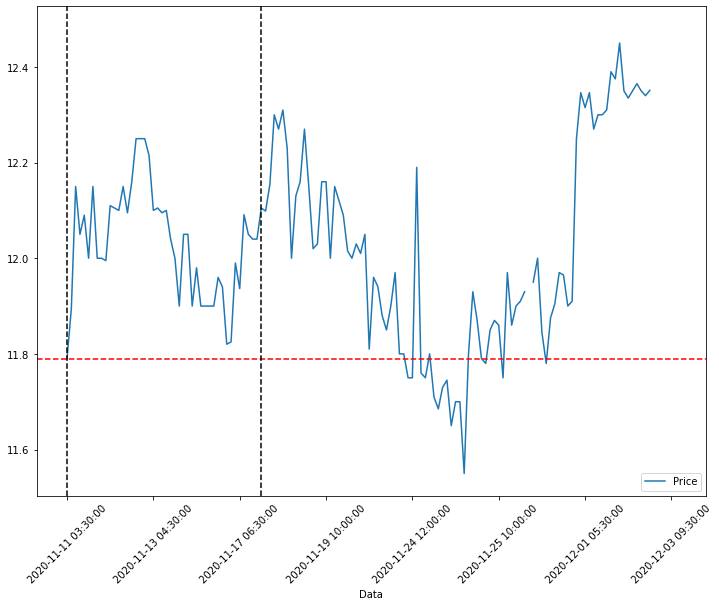

In [200]:
ax = tlk.plot_chart("TRIT", finalData)

In [203]:
finalData.sort_values("Current Rets, %", ascending = False)

,Ticker,IPO Date,Price Jump Date,Days Till Jump,Buy Price,"1d Av. Rets, %","3d Av. Rets, %","1w Av. Rets, %","1M Av. Rets, %","Current Rets, %",Price Data
49,SBE,"December 05, 2019","September 16, 2020",286,$10.08,20.74,36.26,36.66,42.13,218.46,Data Price 0 2019-12...
1,KCAC,"August 17, 2020","September 03, 2020",16,$9.89,77.58,104.87,103.85,83.74,137.67,Data Price 0 2020-08-1...
89,CIIC,"February 03, 2020","November 18, 2020",289,$9.99,32.77,57.41,98.68,None,114.57,Data Price 0 2020-02...
82,LCA,"December 04, 2019","June 29, 2020",207,$9.93,43.75,55.30,53.08,38.38,97.30,Data Price 0 2019-12...
15,IPOB,"June 18, 2020","July 17, 2020",28,$11.49,4.30,4.30,5.13,-0.54,85.79,Data Price 0 2020-06...
73,HCCH,"December 12, 2019","June 17, 2020",188,$10.65,12.91,15.38,11.96,10.73,76.53,Data Price 0 2019-12...
63,GMHI,"December 05, 2019","September 02, 2020",271,$10.61,11.95,10.03,10.61,14.02,69.67,Data Price 0 2019-12...
25,FEAC,"April 27, 2020","July 13, 2020",76,$10.45,6.30,5.60,10.94,8.02,65.49,Data Price 0 2020-04...
91,LSAC,"June 02, 2020","September 29, 2020",119,$10.04,22.10,24.69,27.04,34.82,63.79,Data Price 0 2020-06-0...
26,DMYT,"April 27, 2020","July 27, 2020",91,$10.28,18.07,15.42,11.52,5.78,63.41,Data Price 0 2020-04...
